# **ASSIGNMENT CHAPTER 2**
**Nama : Delta Putik Kemuning**
**SCID : SC62817**

In [ ]:
import pandas as pd
import numpy as np

# **1. Data Preparation**

In [ ]:
# Import train & test data
train = pd.read_csv('train.csv')
df = train.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
np.random.seed(0)

# a. Handling Missing Values

Menampilkan 50 kolom pertama, apakah terdapat missing value pada kolom tersebut.

In [ ]:
missing_values_count = df.isnull().sum()

missing_values_count[0:50]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Dapat dilihat dari output yang dihasilkan bahwa terdapat
 missing value dari sejumlah data yang telah ditampilkan. Untuk menghandling missing value ini ada beberapa cara yang dapat dilakukan diantaranya yakni Deletation dan Imputation

In [ ]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# Persentasi data yang hilang atau tidak ada
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.889565364451209


Deletion


*   Delete Column : Jika missing value berada pada column yang tidak menjadi variable penting bagi analisis yang dilakukan, contohnya pada kolom Alley, Karena memiliki nilai yang hilang dalam jumlah yang sangat besar, yaitu 1369 dari total 1460 baris, sehingga tidak memberikan kontribusi informasi yang signifikan untuk analisis yang sedang dilakukan. Dengan demikian, menghapus kolom tersebut akan membantu menyederhanakan dataset tanpa mengorbankan informasi yang penting.



In [ ]:
df.drop('Alley', axis=1, inplace=True)

*   Delete Row : Jika jumlah perbandingan total baris data keseluruhan dengan jumlah baris missing value relatif kecil dan tidak dapat diimputasi secara akurat, seperti pada kolom Electrical yang hanya memiliki 1 missing value dari total 1460 baris, maka menghapus baris tersebut tidak akan mengurangi signifikansi atau integritas keseluruhan dataset. Oleh karena itu, dalam kasus seperti ini, menghapus baris yang memiliki missing value dapat menjadi langkah yang tepat untuk mempertahankan kualitas data.

In [ ]:
df.dropna(subset=['Electrical'], inplace=True)

Imputation

*   Menggunakan Mean/Median/mode : Contohnya pada kolom LotFrontage yaitu Linear feet of street connected to property mencoba menggunakan median karena untuk memberikan estimasi yang stabil dan konservatif untuk nilai yang hilang tanpa dipengaruhi oleh nilai ekstrem atau outlier, serta representatif untuk distribusi data yang miring.



In [ ]:
median_lotfrontage = df['LotFrontage'].median()

# Mengisi missing value dengan median
df['LotFrontage'].fillna(median_lotfrontage, inplace=True)

*   Menggunakan Fill Forward/Backward : pada dataset ini saya tidak menemukan kasus yang cocok untuk menggunakan Fill Forward/Backward. Tetapi untuk contoh penggunaanya sebagai berikut. Misalkan contohnya ingin mengatasi missing value pada kolom BSMTQual menggunakan Fill Forward

In [ ]:
df['BsmtQual'] = df['BsmtQual'].fillna(method='ffill')

*   Menggunakan Nilai Konstan : Menggunakan nilai konstan seperti "None" atau "Unknown" untuk menggantikan "NA" pada kolom Fence memastikan integritas data, mencegah kebingungan dalam analisis, dan memastikan properti yang sebenarnya tidak memiliki pagar diidentifikasi dengan jelas. Hal ini meningkatkan akurasi analisis data dan menghindari kesalahan interpretasi akibat nilai yang tidak lengkap atau ambigu.

In [ ]:
df['Fence'].fillna('None', inplace=True)

In [ ]:
# Hasil setelah proses Handling Missing Value

missing_values_new = df.loc[:, ['Electrical', 'LotFrontage','BsmtQual', 'Fence']].isnull().sum()

Dapat dilihat sudah tidak ada missing value pada kolom yang sudah diatasi, untuk kolom Alley tidak ditampilkan karena sudah dihapus

In [ ]:
missing_values_new

Electrical     0
LotFrontage    0
BsmtQual       0
Fence          0
dtype: int64

# b. Duplicate Value

In [ ]:
# Identify Duplicate
duplicates_rows = df.duplicated()
duplicates = df[duplicates_rows]
duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Dapat dilihat bahwa tidak ada duplicate value pada dataset yang digunakan sehingga tahapan ini bisa dilewati saja.

# c. Outlier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

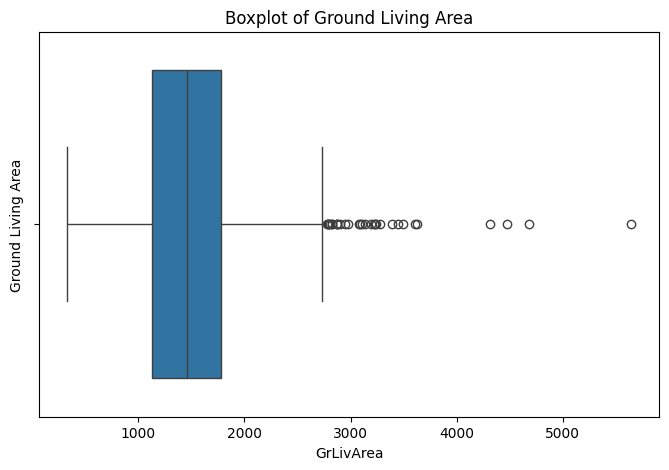

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['GrLivArea'])
plt.title('Boxplot of Ground Living Area')
plt.ylabel('Ground Living Area')
plt.show()

Dapat dilihat bahwa pada kolom GrLivArea terdapat outlier, untuk mengatasi outlier bisa dengan melakukan transformasi, normalisasi, diabaikan, dsb.

Mencoba menampilkan outlier dengan menggunakan z score

In [ ]:
z_scores = (df['GrLivArea'] - df['GrLivArea'].mean()) / df['GrLivArea'].std()

threshold = 3

outliers = df[np.abs(z_scores) > threshold]

print("Outlier:")
print(outliers['GrLivArea'])

Outlier:
118     3222
185     3608
197     3112
304     3493
496     3228
523     4676
608     3194
635     3395
691     4316
769     3279
798     3140
1169    3627
1182    4476
1268    3447
1298    5642
1353    3238
Name: GrLivArea, dtype: int64


Outlier diabaikan saja
Jika dianggap sebagai bagian yang penting dan valid dari data yang diamati, atau jika keberadaannya memiliki makna atau informasi penting dalam konteks analisis yang dilakukan.

Mengatasi outlier dengan menghilangkannya
Jika nilai yang ekstrem tersebut merupakan hasil dari kesalahan pengukuran atau kejadian yang tidak biasa, dan tidak mencerminkan distribusi sebenarnya dari data yang diamati.

In [ ]:
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_without_outliers = df[(df['GrLivArea'] > lower_bound) & (df['GrLivArea'] < upper_bound)]

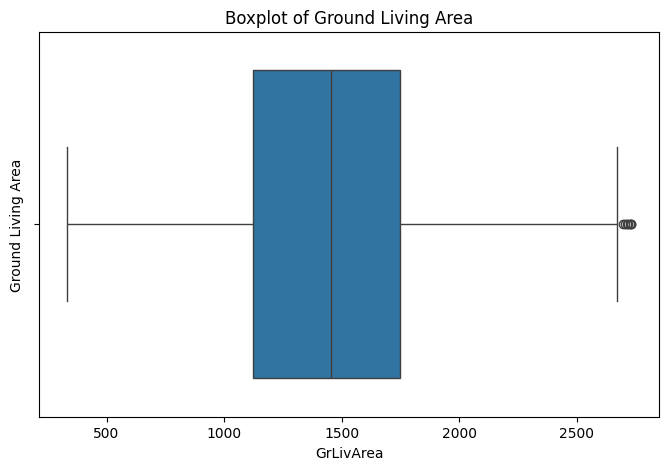

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_without_outliers['GrLivArea'])
plt.title('Boxplot of Ground Living Area')
plt.ylabel('Ground Living Area')
plt.show()

# d. Imbalance Data

In [ ]:
df['CentralAir'].value_counts()

Y    1364
N      95
Name: CentralAir, dtype: int64

<Axes: xlabel='count', ylabel='CentralAir'>

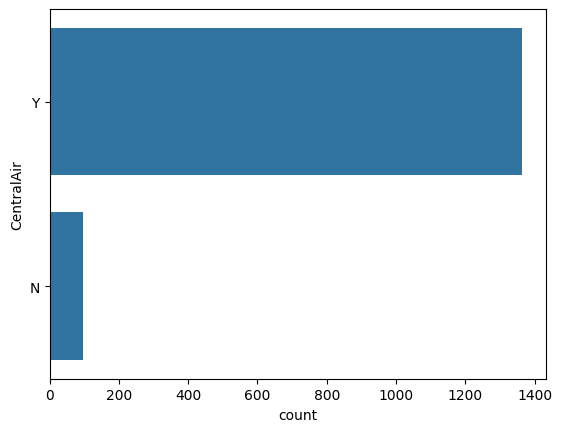

In [ ]:
sns.countplot(df['CentralAir'])

In [ ]:
from sklearn.utils import resample

df_Y = df[df['CentralAir'] == 'Y']
df_N = df[df['CentralAir'] == 'N']

df_Y_undersampled = resample(df_Y,
                              replace=False,
                              n_samples=len(df_N),
                              random_state=42)

df_balanced = pd.concat([df_Y_undersampled, df_N])

print(df_balanced['CentralAir'].value_counts())


Y    95
N    95
Name: CentralAir, dtype: int64


<Axes: xlabel='count', ylabel='CentralAir'>

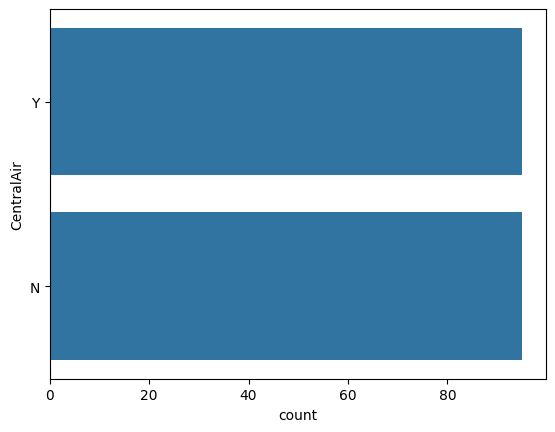

In [ ]:
sns.countplot(df_balanced['CentralAir'])

# e. Feature Encoding

* One Hot Encoding
- Pada kolom Landslope dengan variabel Gtl, Mod, dan Sev mengubah data kategorikal menjadi representasi biner di mana setiap variabel landslope direpresentasikan sebagai kolom baru dengan nilai 1 jika baris tersebut memiliki landslope sesuai dengan variabel tersebut, dan nilai 0 jika tidak.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Siapkan encoder
encoder = OneHotEncoder(sparse_output=False)

# Apply encoder
encoded = encoder.fit_transform(df[["LandSlope"]])
feature_names = encoder.get_feature_names_out(["LandSlope"])
df_one_hot = pd.DataFrame(encoded, columns=feature_names)

df_one_hot

,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1454,1.0,0.0,0.0
1455,1.0,0.0,0.0
1456,1.0,0.0,0.0
1457,1.0,0.0,0.0


* Label Encoding
- Teknik pemrosesan data yang menggantikan nilai kategorikal dengan nilai numerik. Misalnya, dalam kolom LotShape, kategori 'Reg' akan diassign nilai 0, 'IR1' nilai 1, 'IR2' nilai 2, dan 'IR3' nilai 3. Begitu pula pada kolom HeatingQC, 'Ex' diassign nilai 0, 'Gd' nilai 1, 'TA' nilai 2, 'Fa' nilai 3, dan 'Po' nilai 4. Teknik ini memungkinkan representasi numerik dari data kategorikal, meskipun tidak selalu mencerminkan urutan yang bermakna.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_label_encoded = df.copy()
df_label_encoded["LotShape"] = encoder.fit_transform(df["LotShape"])
df_label_encoded["HeatingQC"] = encoder.fit_transform(df["HeatingQC"])

df_label_encoded[["LotShape", "HeatingQC"]]


,LotShape,HeatingQC
0,3,0
1,3,0
2,0,0
3,0,2
4,0,0
...,...,...
1455,3,0
1456,3,4
1457,3,0
1458,3,2


# **2. Exploratory Data Analysis**

### a. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)


* Feature yang memiliki tipe data Nominal

In [ ]:
df['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1459, dtype: object

Variabel "MSZoning : The general zoning classification" digolongkan sebagai tipe data kategorikal nominal karena kategorinya tidak memiliki urutan yang bermakna di antara mereka. Setiap kategori, seperti "RL" atau "RM", hanya merepresentasikan label untuk jenis zona tertentu dalam penjualan, tanpa adanya peringkat yang intrinsik di antara mereka.

* Feature yang memiliki tipe data Ordinal

In [ ]:
df['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1459, dtype: int64

Kolom "OverallQual : Overall material and finish quality" termasuk dalam tipe data Ordinal karena nilainya merepresentasikan tingkatan kualitas yang bisa diurutkan secara berarti. Dengan skala nilai dari 1 hingga 10 yang mencakup kualitas mulai dari "Very Poor" hingga "Very Excellent", setiap nilai memiliki urutan yang jelas dan bermakna. Meskipun perbedaan antara nilai-nilai tidak menunjukkan besaran perbedaan yang tetap, kita masih dapat mengurutkan nilai-nilai ini dari yang terendah hingga yang tertinggi, sehingga menjadikannya sebagai tipe data ordinal.

* Feature yang memiliki tipe data Numerical

In [ ]:
df[['LotArea', 'GrLivArea']]

,LotArea,GrLivArea
0,8450,1710
1,9600,1262
2,11250,1786
3,9550,1717
4,14260,2198
...,...,...
1455,7917,1647
1456,13175,2073
1457,9042,2340
1458,9717,1078


Variabel "LotArea : Lot size in square feet" merupakan tipe data numerical karena menggambarkan ukuran luas tanah dalam satuan kaki persegi. Nilai-nilainya terdiri dari angka yang merepresentasikan luas tanah secara numerik, yang dapat beragam mulai dari angka kecil hingga besar tergantung pada luas tanah yang dimiliki. Karena "LotArea" mengukur besaran yang dapat diukur secara kuantitatif dan mengandung nilai numerik yang kontinu, maka variabel ini tergolong sebagai tipe data numerik.

### b. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus



In [ ]:
df['GrLivArea'].describe()

count    1459.000000
mean     1515.546950
std       525.650927
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: GrLivArea, dtype: float64

* Mean
- Biasanya digunakan untuk distribusi data yang simetris dan berbentuk normal. Namun, mean sensitif terhadap nilai ekstrem atau outlier. Pada distribusi normal, mean, median, dan modus biasanya berada pada nilai yang sama.

In [ ]:
df['GrLivArea'].mean()

1515.54694996573

* Median
- Ideal digunakan pada data yang terdistribusi tidak normal atau memiliki outlier. Median adalah nilai tengah ketika data diurutkan, sehingga tidak dipengaruhi oleh nilai ekstrem. Ini membuat median lebih baik dalam merepresentasikan pusat distribusi data pada kasus-kasus di mana distribusi tidak simetris.

In [ ]:
df['GrLivArea'].median()

1464.0

* Modus
- Merupakan nilai yang paling sering muncul dalam kumpulan data. Modus berguna untuk data kategorikal atau untuk melihat nilai yang paling umum dalam data. Modus berguna dalam menentukan kecenderungan dalam distribusi data yang berbentuk bimodal atau multimodal (distribusi data yang memiliki lebih dari satu puncak).

In [ ]:
df['GrLivArea'].mode()

0    864
Name: GrLivArea, dtype: int64

### c. Menemukan dan mendeskripsikan statistical five summaries

Ringkasan statistik yang menggambarkan distribusi dari suatu dataset :
* Minimum: Nilai terkecil dalam dataset, menunjukkan batas bawah distribusi data.
* Quartil Pertama (Q1): Nilai yang membagi 25% data terendah, menunjukkan nilai tengah dari setengah bagian bawah distribusi data.
* Median (Q2): Nilai tengah dalam dataset ketika data diurutkan secara ascending, membagi dataset menjadi dua bagian yang sama besar, dan merupakan ukuran pusat yang umum digunakan.
* Quartil Ketiga (Q3): Nilai yang membagi 25% data tertinggi, menunjukkan nilai tengah dari setengah bagian atas distribusi data.
* Maximum: Nilai terbesar dalam dataset, menunjukkan batas atas distribusi data.

In [ ]:
df['LotArea'].describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

Deskripsi five statistical summaries dari kolom "LotArea" adalah sebagai berikut:

- Mean (Rata-rata): Rata-rata ukuran area lot adalah sekitar 10517.36.
- Min (Minimum): Ukuran area lot terkecil adalah 1300.
- 25% (Quartil Pertama atau Q1): 25% dari data memiliki ukuran area lot kurang dari atau sama dengan 7549.
- 50% (Median): Nilai tengah atau median dari ukuran area lot adalah sekitar 9477.
- 75% (Quartil Ketiga atau Q3): 75% dari data memiliki ukuran area lot kurang dari atau sama dengan 11603.
- Max (Maximum): Ukuran area lot terbesar adalah 215245.

Ringkasan ini memberikan gambaran tentang distribusi ukuran area lot (dalam satuan ft^2) dalam dataset, mulai dari ukuran terkecil hingga terbesar, serta seberapa tersebar ukuran tersebut dari rata-rata.

### d. Mendeskripsikan distribusi data

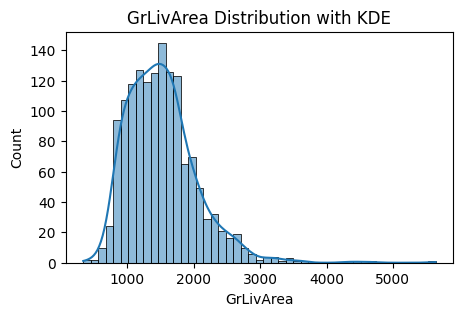

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(df['GrLivArea'], ax=ax, kde=True)

ax.set_title("GrLivArea Distribution with KDE")

plt.show()

In [ ]:
df['GrLivArea'].describe()

count    1459.000000
mean     1515.546950
std       525.650927
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: GrLivArea, dtype: float64

Distribusi data ini menunjukkan kemiringan ke kanan (skewed to the right), dengan sebagian besar nilai cenderung terkonsentrasi di sebelah kiri grafik. Hal ini terlihat dari rata-rata yang lebih tinggi dari median. Data memiliki variasi yang signifikan, ditunjukkan oleh standar deviasi yang cukup besar. Rentang data yang luas dari nilai minimum hingga maksimum menunjukkan keberagaman dalam dataset. Kuartil bawah (25%) dan median berada pada nilai yang lebih rendah, sementara kuartil atas (75%) berada pada nilai yang lebih tinggi. Hal ini menunjukkan bahwa sebagian besar data terletak di bagian bawah distribusi, dengan beberapa nilai yang lebih tinggi memberikan ekor panjang ke arah kanan. Dengan demikian, distribusi data cenderung memiliki nilai-nilai ekstrem yang tinggi.

# **3. Feature Engineering**

a. TotalSF: Total luas area (kaki persegi) dari lantai pertama, lantai kedua, dan basement. Ini merupakan indikator penting untuk menilai ukuran dan potensi fungsionalitas sebuah properti. Rumah dengan TotalSF yang lebih besar cenderung memiliki nilai yang lebih tinggi karena mereka menawarkan lebih banyak ruang hidup bagi pemiliknya.

In [ ]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

b. Age: Umur rumah pada saat penjualan (dihitung dari tahun penjualan - tahun dibangun). Umumnya, rumah-rumah yang lebih baru cenderung memiliki nilai yang lebih tinggi karena mereka sering kali memerlukan sedikit pemeliharaan dan memiliki fasilitas modern. Di sisi lain, rumah-rumah yang lebih tua mungkin memerlukan pembaruan dan renovasi, yang dapat memengaruhi nilai jualnya. Oleh karena itu, Age adalah faktor penting yang memengaruhi harga properti dalam dataset.








In [ ]:
df['Age'] = df['YrSold'] - df['YearBuilt']

c. RemodelAge: Umur dari remodel pada saat penjualan (dihitung dari tahun penjualan - tahun remodel). Properti dengan RemodelAge yang lebih rendah cenderung memiliki nilai yang lebih tinggi karena mereka menawarkan fasilitas yang lebih mutakhir dan terbaru. Sebaliknya, properti dengan RemodelAge yang lebih tinggi mungkin memerlukan perhatian lebih lanjut dari pembeli potensial terkait dengan kondisi dan pembaruan yang mungkin diperlukan. Oleh karena itu, RemodelAge adalah faktor penting dalam mengevaluasi nilai sebuah properti dalam dataset harga rumah.

In [ ]:
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

d. TotalBath: Total jumlah kamar mandi lengkap dan setengah di atas grade dan di basement. Properti dengan TotalBath yang lebih tinggi cenderung memiliki nilai yang lebih tinggi karena mereka menawarkan kenyamanan yang lebih besar bagi penghuninya. Kamar mandi tambahan juga dapat menjadi faktor penting bagi pembeli rumah yang mencari kenyamanan dan fungsionalitas yang optimal. Oleh karena itu, TotalBath adalah fitur penting dalam mengevaluasi nilai sebuah properti dalam dataset harga rumah.









In [ ]:
df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

e. TotalPorchSF: Total luas area porch terbuka, porch tertutup, dan porch layar. Rumah dengan TotalPorchSF yang lebih besar cenderung memiliki nilai yang lebih tinggi karena mereka menawarkan ruang tambahan yang dapat digunakan secara fleksibel oleh penghuninya. Porch yang luas juga dapat meningkatkan daya tarik visual dan nilai estetika sebuah properti. Oleh karena itu, TotalPorchSF adalah fitur yang relevan dalam mengevaluasi nilai sebuah properti dalam dataset harga rumah.

In [ ]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

f. TotalFlrSF: Total luas area lantai pertama dan lantai kedua.
 Properti dengan TotalFlrSF yang lebih besar cenderung memiliki nilai yang lebih tinggi karena mereka menawarkan lebih banyak ruang untuk penghuninya. Ruang yang luas dan nyaman dapat menjadi faktor penentu bagi pembeli rumah yang mencari kehidupan yang lebih lapang dan fungsional. Oleh karena itu, TotalFlrSF adalah fitur penting dalam mengevaluasi nilai sebuah properti dalam dataset harga rumah.

In [ ]:
df['TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']

g. HouseAgeCategory:  fitur yang mengkategorikan umur rumah dari saat dibangun hingga dijual. Penentuan kategori umur rumah penting karena memengaruhi harga jual properti. Pembeli tertarik pada rumah yang relatif baru atau dalam kondisi terbaik karena umumnya membutuhkan sedikit perawatan, sehingga mereka cenderung bersedia membayar lebih untuk properti tersebut. Sebaliknya, rumah yang lebih tua atau membutuhkan perbaikan mungkin memiliki harga jual yang lebih rendah karena memerlukan investasi tambahan dari pembeli.

In [ ]:
def categorize_age(age):
    if age <= 10:
        return 'New'
    elif 10 < age <= 50:
        return 'Young'
    else:
        return 'Old'

df['HouseAgeCategory'] = df['Age'].apply(categorize_age)

h. Pengkategorian Luas Tanah: Dengan mengkategorikan luas lot menjadi "Kecil", "Sedang", atau "Besar", kita dapat memberikan gambaran kepada pembeli tentang ukuran tanah yang mereka dapatkan dengan properti tersebut. Pembeli mungkin lebih tertarik pada lot yang lebih besar karena memberikan lebih banyak ruang untuk pengembangan, kebun, atau fasilitas tambahan lainnya.

In [ ]:
def categorize_lot_area(area):
    if area < 5000:
        return 'Small'
    elif 5000 <= area <= 10000:
        return 'Medium'
    else:
        return 'Large'

df['LotAreaCategory'] = df['LotArea'].apply(categorize_lot_area)

i. Rasio Bangunan dengan Tanah: ukuran yang menggambarkan seberapa besar bangunan memanfaatkan lahan yang tersedia. Dengan mengetahui rasio ini, kita dapat memahami sejauh mana lahan dimanfaatkan untuk bangunan, yang penting dalam mengevaluasi efisiensi penggunaan lahan dan memahami nilai properti.








In [ ]:
df['Ratio'] = df['TotalBsmtSF'] / df['LotArea']

def find_closest_fraction(ratio):
    lower_num, lower_denom = 0, 1
    upper_num, upper_denom = 1, 1

    for denominator in range(1, 1001):  # Mencari sampai batas 1000
        numerator = round(ratio * denominator)
        if abs(numerator / denominator - ratio) < abs(lower_num / lower_denom - ratio):
            lower_num, lower_denom = numerator, denominator
        if abs(numerator / denominator - ratio) <= abs(upper_num / upper_denom - ratio):
            upper_num, upper_denom = numerator, denominator

    return f"{lower_num}:{lower_denom}" if lower_num > 0 else f"{upper_num}:{upper_denom}"

df['BuildingToLandRatio'] = df['Ratio'].apply(find_closest_fraction)

j. Sisa tanah yang belum dibangun: jumlah lahan yang tersisa setelah area bangunan dibangun. Informasi ini penting karena dapat memberikan gambaran tentang potensi pengembangan atau pemanfaatan lebih lanjut dari properti tersebut.

In [ ]:
df['UnbuiltLand'] = df['LotArea'] - df['TotalBsmtSF']

k. Kategori Sisa Tanah: Kategori sisa tanah menggambarkan seberapa banyak lahan yang tersisa setelah pembangunan rumah. Ini penting karena dapat memberikan informasi tentang potensi pengembangan lebih lanjut atau pemanfaatan lahan yang belum digunakan.








In [ ]:
small_land = 10000
medium_land = 25000

def categorize_land(unbuilt_land):
    if unbuilt_land < small_land:
        return 'Small'
    elif small_land <= unbuilt_land < medium_land:
        return 'Medium'
    else:
        return 'Large'

df['UnbuiltLandCategory'] = df['UnbuiltLand'].apply(categorize_land)

In [ ]:
df[['TotalSF','HouseAgeCategory', 'Age', 'RemodelAge', 'TotalBath', 'TotalPorchSF', 'TotalFlrSF', 'LotAreaCategory', 'BuildingToLandRatio', 'UnbuiltLand', 'UnbuiltLandCategory']].head(10)

,TotalSF,HouseAgeCategory,Age,RemodelAge,TotalBath,TotalPorchSF,TotalFlrSF,LotAreaCategory,BuildingToLandRatio,UnbuiltLand,UnbuiltLandCategory
0,2566,New,5,5,4,61,1710,Medium,70:691,7594,Small
1,2524,Young,31,31,3,0,1262,Medium,117:890,8338,Small
2,2706,New,7,6,4,42,1786,Large,57:697,10330,Medium
3,2473,Old,91,36,2,307,1717,Medium,68:859,8794,Small
4,3343,New,8,8,4,84,2198,Large,11:137,13115,Medium
5,2158,Young,16,14,3,350,1362,Large,56:993,13319,Medium
6,3380,New,3,2,3,57,1694,Large,158:945,8398,Small
7,3197,Young,36,36,4,432,2090,Large,37:347,9275,Small
8,2726,Old,77,58,2,205,1774,Medium,7:45,5168,Small
9,2068,Old,69,58,2,4,1077,Medium,119:891,6429,Small


In [ ]:
df.to_csv('train.csv', index=False)


NameError: name 'df' is not defined